# Q.6 Assignment 2


In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import distance

# Reading Files

In [2]:
import os

path = '/home/jeevesh/Desktop/smai/assignment2/OneDrive_1_15-02-2020/Datasets/Question-6/dataset/'

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.txt' in file:
            files.append(os.path.join(r, file))

In [3]:
files[21]

'/home/jeevesh/Desktop/smai/assignment2/OneDrive_1_15-02-2020/Datasets/Question-6/dataset/325_1.txt'

# Saving the file names from Directory

In [4]:
import os
print(os.path.basename(files[1]))

131_5.txt


In [5]:
file_idx=[]
cluster_idx=[]

In [6]:
for i in files:
    file_idx.append(os.path.basename(i))
    
    

# Saving the labels in Clusters_idx

In [7]:
for i in file_idx:
    cluster_idx.append(i[-5])
#     print(i)
#     print(i[-5])
    

In [8]:
print(file_idx[1])
print(cluster_idx[1])

131_5.txt
5


In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# Importing words from files in fullofwords

In [10]:
bag_of_words=[]

In [45]:
fullofwords=[]
for file in files:
  fptr=open(file,'rb')
  filedata=fptr.read().decode('utf-8','ignore')
  fullofwords.append(filedata)

# Applying Tfidf Vectorizer

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', lowercase = 'true')
X = vectorizer.fit_transform(fullofwords)

# converting sparse to dense matrix

In [47]:
feature_matrix = X.toarray()

# Defining List for Centroid

In [16]:
centroid_with_each_cluster=[]

In [18]:
centroid_with_each_cluster

[]

# Implementing K-means Algorithm

# The way kmeans algorithm works is as follows:
## 1.Specify number of clusters K.
## 2.Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
## 3.Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
### ->Compute the sum of the squared distance between data points and all centroids.
### ->Assign each data point to the closest cluster (centroid).
### ->Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

In [32]:
centroid_with_each_cluster=[]
random_number=[]

from random import seed
from random import randint

seed(1)
for _ in range(5):
    value = randint(0, 1725)
    random_number.append(value)
    
for i in random_number:
    centroid_with_each_cluster.append(feature_matrix[i])    

#iterations
iterations = 100
for i in range(0,iterations):
    
    temp_container=[[],[],[],[],[],[]]

    for j in range(0,len(feature_matrix)):
        min_value=999999
        cluster_value=0
        
        for cluster_index in range(len(centroid_with_each_cluster)):
            
            dist=np.linalg.norm(centroid_with_each_cluster[cluster_index]-feature_matrix[j])
            
            if(dist<min_value):
                min_value = dist
                cluster_value=cluster_index+1

        temp_container[cluster_value].append(feature_matrix[j])
        cluster_idx[j]=cluster_value

    
    for idx in range(len(centroid_with_each_cluster)):
        centroid_with_each_cluster[idx] = (np.mean(temp_container[idx+1],axis=0)) 

        

# Size of each cluster after k means

In [33]:
for i in range(len(temp_container)):
    print(len(temp_container[i]))

0
396
356
559
161
253


In [35]:
actual_container = [[],[],[],[],[],[]]




In [36]:

for i in file_idx:
    actual_container[(int(i[-5]))].append(i)

In [37]:
predicted_container=[[],[],[],[],[],[]]
for idx in range(len(cluster_idx)):
    predicted_container[cluster_idx[idx]].append(int(file_idx[idx][-5]))
    


In [38]:
import statistics 
for i in range(1,6):
    print(statistics.mode(predicted_container[i]))

4
5
1
3
2


In [39]:
print(type(predicted_container[1][50]))
print(type(statistics.mode(predicted_container[1])))

<class 'int'>
<class 'int'>


cluster_idx[0]

In [40]:
frequency_count_of_mode=[[],[],[],[],[],[]]
for i in range(1,6):
    correct=0
    for j in range(0,len(predicted_container[i])):
        if (predicted_container[i][j] == statistics.mode(predicted_container[i])):
            correct=correct+1
            print(correct)
           
    frequency_count_of_mode[statistics.mode(predicted_container[i])]=correct    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [41]:
correct_result=0
total=0
for i in range(1,len(actual_container)):
    print(len(actual_container[i]),frequency_count_of_mode[i])
    correct_result += frequency_count_of_mode[i]
    total += len(actual_container[i])
print(correct_result)
print(total)

410 402
286 239
317 160
411 386
301 268
1455
1725


# predicting Accuracy

In [42]:
accuracy=(correct_result/total)
print(accuracy)

0.8434782608695652


In [43]:
starting_values=[]
for i in file_idx:
    starting_values.append(int(i[-5]))

# Predicting Homogeneity Score 

In [44]:
from sklearn.metrics.cluster import homogeneity_score
homogeneity_score(starting_values,cluster_idx)

0.6801354808786624

# Implementing from K Means of Sklearn

# Setting Clusters=3

In [48]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3,random_state=2)
model.fit(feature_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

# Setting Clusters=5

In [49]:

model=KMeans(n_clusters=5,random_state=2)
model.fit(feature_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

# Setting Clusters=7

In [50]:

model=KMeans(n_clusters=7,random_state=2)
model.fit(feature_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [51]:
answer=model.predict(feature_matrix)

In [53]:

val=[]
for i in range(1,9):
    tempModel=KMeans(n_clusters=i,random_state=2)
    tempModel.fit(feature_matrix)
    val.append(tempModel.inertia_)

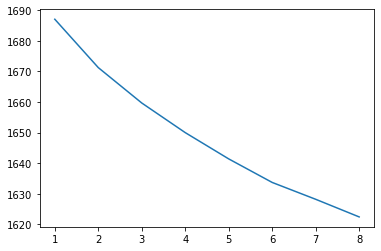

In [56]:
import matplotlib.pyplot as plt
plt.plot(range(1,9),val)